In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('housePrice.csv')
df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


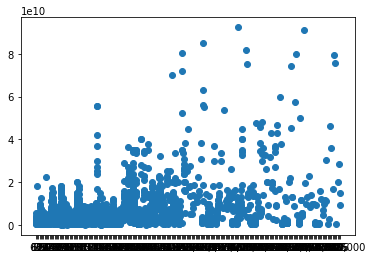

In [3]:
plt.scatter(df.Area, df.Price)

## Easy way :D

0.6143884892086331

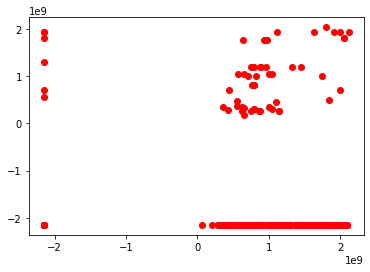

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# X = df.drop(columns=['Price', 'Price(USD)', 'Parking', 'Warehouse', 'Elevator', 'Address'])

X = df[['Area', 'Room']]

y = np.int32(df['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

result = model.predict(X_test)

plt.plot(y_test, result, 'or')
accuracy_score(y_test, result)
